First 5 rows of the dataset:
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
Missing values per column:
 Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
Number of duplicate rows: 0


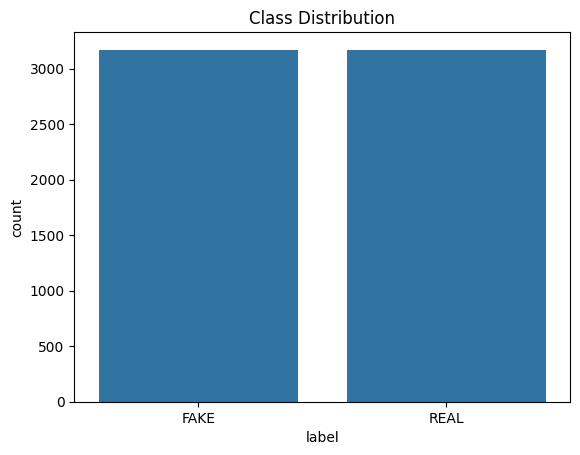

Class Distribution:
 label
REAL    3171
FAKE    3164
Name: count, dtype: int64
Shape of padded training data: (4751, 100)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and inspect the dataset
df = pd.read_csv("news.csv")
print("First 5 rows of the dataset:")
print(df.head(5))

# Check for missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())

# Drop missing values and duplicates if any
df = df.dropna()
df = df.drop_duplicates()

# Visualize class distribution
sns.countplot(data=df, x='label')
plt.title("Class Distribution")
plt.show()

# Display class distribution counts
cls_dist = df['label'].value_counts()
print("Class Distribution:\n", cls_dist)

# Preprocessing
max_words = 1000  # Max vocabulary size
max_len = 100     # Max sequence length
embedding_dim = 50  # Dimension of the embedding layer

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

# Tokenize the texts
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure equal length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Encode the labels (binary encoding)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Print padded data shape
print("Shape of padded training data:", X_train_padded.shape)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2

# Model Building
model = Sequential([
    # Define input shape for embedding layer (e.g., sequence length of 100 and vocabulary size)
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),  
    # Add bidirectional LSTM with L2 regularization and dropout
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2, kernel_regularizer=l2(0.01))),
    BatchNormalization(),  # Batch normalization layer for better convergence
    Dropout(0.3),
    # Another LSTM layer with dropout
    LSTM(128, return_sequences=False, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    # Dense layer with dropout
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    # Output layer with a single neuron for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the model explicitly
model.build(input_shape=(None, max_len))  # Input shape should match your padded input data

# Display model summary
model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100, 256)       │       183,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 448,081 (1.71 MB)

 Trainable params: 447,569 (1.71 MB)

 Non-trainable params: 512 (2.00 KB)

In [23]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights = dict(enumerate(class_weights))

In [24]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-6)

In [ ]:
history = model.fit(
    X_train_padded, y_train_encoded, 
    epochs=20, 
    validation_data=(X_test_padded, y_test_encoded), 
    batch_size=32,
    callbacks=[lr_reduction],  # Learning rate scheduler
    class_weight=class_weights,  # Use class weights to handle imbalanced data
    verbose=2
)


Epoch 1/20
149/149 - 28s - 185ms/step - accuracy: 0.6927 - loss: 2.2009 - val_accuracy: 0.7683 - val_loss: 0.8078 - learning_rate: 1.0000e-03
Epoch 2/20
149/149 - 19s - 128ms/step - accuracy: 0.8045 - loss: 0.5793 - val_accuracy: 0.8333 - val_loss: 0.5799 - learning_rate: 1.0000e-03
Epoch 3/20
149/149 - 19s - 128ms/step - accuracy: 0.8350 - loss: 0.4457 - val_accuracy: 0.7973 - val_loss: 0.5157 - learning_rate: 1.0000e-03
Epoch 4/20
149/149 - 19s - 128ms/step - accuracy: 0.8535 - loss: 0.3966 - val_accuracy: 0.8428 - val_loss: 0.5051 - learning_rate: 1.0000e-03
Epoch 5/20
149/149 - 20s - 132ms/step - accuracy: 0.8617 - loss: 0.4342 - val_accuracy: 0.8239 - val_loss: 0.5734 - learning_rate: 1.0000e-03
Epoch 6/20
149/149 - 62s - 417ms/step - accuracy: 0.8733 - loss: 0.4049 - val_accuracy: 0.8933 - val_loss: 0.3478 - learning_rate: 1.0000e-03
Epoch 7/20
149/149 - 68s - 453ms/step - accuracy: 0.7849 - loss: 0.6002 - val_accuracy: 0.7323 - val_loss: 0.6317 - learning_rate: 1.0000e-03
Epoch 

In [15]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [11]:

# Save the trained model
model.save('text_classification.h5')


In [12]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded, verbose=2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


50/50 - 1s - 11ms/step - accuracy: 0.9501 - loss: 0.2014
Test Accuracy: 95.01%


In [13]:

# Test cases to validate
print("\nTesting with some sample inputs:")
sample_texts = ["Breaking news about politics", "This is fake news"]
sample_seq = tokenizer.texts_to_sequences(sample_texts)
sample_padded = pad_sequences(sample_seq, maxlen=max_len, padding='post')
predictions = model.predict(sample_padded)
for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text} => Prediction: {'Real' if pred > 0.5 else 'Fake'}")



Testing with some sample inputs:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Text: Breaking news about politics => Prediction: Real
Text: This is fake news => Prediction: Fake


In [14]:
from sklearn.metrics import classification_report

predictions = (model.predict(X_test_padded) > 0.5).astype("int32")
print(classification_report(y_test_encoded, predictions, target_names=['FAKE', 'REAL']))


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

        FAKE       0.94      0.96      0.95       794
        REAL       0.96      0.94      0.95       790

    accuracy                           0.95      1584
   macro avg       0.95      0.95      0.95      1584
weighted avg       0.95      0.95      0.95      1584

